# Metric #3: Police Arrests- Moshood Adebule

In [7]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
# Import data
police_arrests = pd.read_csv("police-arrest.csv")

police_arrests.head(10)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
6,1974628,16147655,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
7,1974607,16146037,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
8,1974643,16132537,17.0,M,B,2016-08-29T17:55:00,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,0.000000,0.000000
9,1974647,16138646,14.0,M,B,2016-08-23T13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Amount')

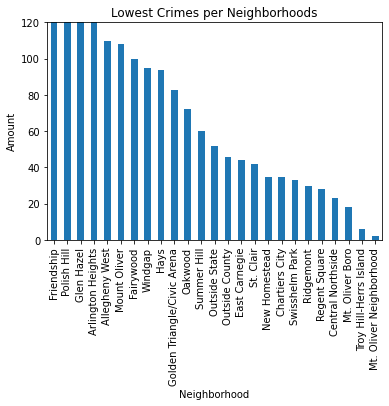

In [9]:
# Get data related to arrests within certain neighborhoods, then plot that data
rates = police_arrests['INCIDENTNEIGHBORHOOD'].value_counts()
rates.tail(25).plot(kind="bar", ylim=[0,120])
plt.title("Lowest Crimes per Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Amount")

## Graphical Data

In [14]:
# Read in new data set, print out first 10 instances
major_arrests = pd.read_csv("arrests-for-major-crimes-1972.csv")
major_arrests.head(10)

,neighborhood,population,overall_crime_rate,number_arrests_murder,crime_rate_murder,number_arrests_rape,crime_rate_rape,number_arrests_robbery,crime_rate_robbery,number_arrests_assault,crime_rate_assault,number_arrests_burglary,crime_rate_burglary,number_arrests_larceny,crime_rate_larceny
0,31st Ward,7594,2.03,0,0.00,1,0.01,7,0.09,45,0.60,55,0.73,45,0.60
1,Allegheny Center,588,52.04,0,0.00,2,0.34,24,4.08,30,5.10,14,2.38,236,40.14
2,Allegheny West,1159,14.33,1,0.09,3,0.26,16,1.38,17,1.47,53,4.57,76,6.56
3,Allentown,5042,3.13,0,0.00,1,0.08,23,0.46,41,0.81,48,0.95,45,0.89
4,Arlington,4758,2.50,0,0.00,0,0.00,7,0.15,33,0.69,44,0.92,35,0.74
5,Arlington Heights,1989,6.19,0,0.00,2,0.10,14,0.70,61,3.07,21,1.06,25,1.26
6,Banksville,6235,1.94,0,0.00,2,0.03,8,0.13,8,0.13,53,0.85,50,0.80
7,Bedford Dwellings,3635,2.64,1,0.03,4,0.11,11,0.30,25,0.69,36,0.99,19,0.52
8,Beechview,12965,1.98,1,0.01,1,0.01,26,0.20,43,0.33,84,0.65,101,0.78
9,Beltzhoover,5980,6.37,1,0.02,3,0.05,63,1.05,58,0.97,121,2.02,135,2.26


In [ ]:
a_murder = major_arrests['number_arrests_murder']
a_rape = major_arrests['number_arrests_rape']
a_rob = major_arrests['number_arrests_robbery']
a_assault = major_arrests['number_arrests_assault']
a_burglary = major_arrests['number_arrests_burglary']
a_larceny = major_arrests['number_arrests_larceny']

arrests_total = pd.concat([arrests_murder, arrests_rape, arrests_robbery, arrests_assault, arrests_burglary, arrests_larceny], axis=1)
arrests_total.plot(figsize=(10, 10))

plt.title("Crimes per Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Amount")

## Analysis
Based on the results of this code, I found that Mount Oliver Neighborhood, Troy Hill-Herrs, and Mount Oliver Borouugh were most safe due to the fact that they recived the lowest amount of crimes whereas Freindship, Polish Hill, Glen Hazel and more were worst neighborhood crime wise.